## ⏱️ **GENETIC ALGORITHM COMPUTATION TIME TRACKING**

### 🎯 **TUJUAN PENELITIAN EFISIENSI KOMPUTASIONAL**

Sesuai dengan rumusan masalah penelitian:

> **"Bagaimana perbandingan efisiensi komputasional waktu tuning, sumber daya yang dibutuhkan antara metode-metode Hyperparameter Tuning yang diterapkan pada model Transfer Learning untuk klasifikasi citra batik?"**

### 📊 **METRICS YANG DITRACK UNTUK GENETIC ALGORITHM:**

1. **⏱️ Total Waktu Komputasi**: Waktu total dari awal sampai selesai
2. **🧬 Waktu Genetic Algorithm Tuning**: Waktu yang dibutuhkan untuk hyperparameter tuning
3. **📊 Waktu Evaluasi**: Waktu yang dibutuhkan untuk evaluasi model
4. **💾 Memory Usage**: Penggunaan memori selama proses
5. **🖥️ CPU Usage**: Penggunaan CPU selama proses
6. **📅 Timestamp**: Waktu mulai dan selesai
7. **🔄 Generasi Progress**: Progress evolusi generasi
8. **🏆 Fitness Tracking**: Tracking fitness score terbaik

### 🔧 **IMPLEMENTASI:**

- **Time Tracking**: Tracking waktu Genetic Algorithm tuning
- **Resource Monitoring**: Monitoring penggunaan sistem
- **JSON Export**: Menyimpan hasil timing untuk analisis
- **Real-time Logging**: Log progress selama proses
- **Generation Tracking**: Tracking progress evolusi

### 📈 **MANFAAT:**

1. **Perbandingan Efisiensi**: Dapat membandingkan waktu komputasi antar metode
2. **Resource Optimization**: Mengetahui penggunaan resource yang optimal
3. **Cost Analysis**: Analisis biaya komputasi untuk penelitian
4. **Reproducibility**: Memastikan hasil dapat direproduksi dengan timing yang konsisten
5. **Evolution Analysis**: Analisis evolusi fitness score

### 🎯 **SESUAI TUJUAN PENELITIAN:**

> **"Menghasilkan data perbandingan terukur mengenai efisiensi komputasional meliputi waktu tuning dan estimasi kebutuhan sumber daya dari penerapan ketiga metode Hyperparameter Tuning tersebut pada model Transfer Learning MobileNetV2 untuk tugas klasifikasi citra batik."**

In [34]:
# =========== GENETIC ALGORITHM TIME TRACKING ===========
import time
import psutil
import os
from datetime import datetime
import json
import gc

# Start tracking
genetic_algorithm_start_time = time.time()
genetic_algorithm_start_datetime = datetime.now()

print("⏱️  Mulai tracking waktu komputasi: Genetic Algorithm")
print(f"📅 Waktu mulai: {genetic_algorithm_start_datetime.strftime('%Y-%m-%d %H:%M:%S')}")

# Memory monitoring function
def log_memory_usage():
    process = psutil.Process(os.getpid())
    memory_info = process.memory_info()
    print(f"📊 Penggunaan memori: {memory_info.rss / 1024 / 1024:.2f} MB")


⏱️  Mulai tracking waktu komputasi: Genetic Algorithm
📅 Waktu mulai: 2025-07-31 22:57:04


In [35]:
# ========== Standard Library ==========
import os
import random
import shutil
import copy
import warnings
from collections import Counter, defaultdict
from datetime import datetime

# ========== Data Handling & Utilities ==========
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

# ========== Visualization ==========
import seaborn as sns
import matplotlib.pyplot as plt

# ========== Scikit-learn ==========
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import compute_class_weight

# ========== TensorFlow & Keras ==========
import tensorflow as tf
from tensorflow import keras
from keras.layers import TFSMLayer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    GlobalAveragePooling2D,
    Dense,
    Dropout,
)
from tensorflow.keras.applications import InceptionV3, MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
    load_img,
    img_to_array,
)
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
    Callback,
)
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

# ========== Suppress Warnings ==========
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')


In [36]:
# ========== GPU Detection ==========
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print("✅ TensorFlow mendeteksi GPU (CUDA):")
    for gpu in gpus:
        print(f"  - {gpu.name}")
        # Aktifkan memory growth agar tidak langsung memakai seluruh memori GPU
        try:
            tf.config.experimental.set_memory_growth(gpu, True)
        except Exception as e:
            print(f"⚠️  Gagal mengatur memory growth untuk {gpu.name}: {e}")
else:
    print("⚠️  TensorFlow TIDAK mendeteksi GPU. Model akan berjalan di CPU.")


✅ TensorFlow mendeteksi GPU (CUDA):
  - /physical_device:GPU:0


In [37]:
# ========== Path Dataset ==========
base_dir = '/home/nvidia/Batik-Final/data/splits/dataset_split'
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

# ========== Fungsi Hitung Gambar per Kelas ==========
def count_images_per_class(directory):
    return {
        cls: len(os.listdir(os.path.join(directory, cls)))
        for cls in os.listdir(directory)
        if os.path.isdir(os.path.join(directory, cls))
    }

# ========== Hitung dan Gabungkan Jumlah Gambar ==========
train_counts = count_images_per_class(train_dir)
val_counts   = count_images_per_class(val_dir)
test_counts  = count_images_per_class(test_dir)

total_gambar = sum(train_counts.values()) + sum(val_counts.values()) + sum(test_counts.values())

# Gabungkan ke dalam DataFrame
df = pd.DataFrame({
    'Train': train_counts,
    'Validation': val_counts,
    'Test': test_counts
}).T.fillna(0).astype(int).T  # Transpose agar kelas sebagai indeks

# ========== Cetak Hasil ==========
print(f"🖼️  Total gambar: {total_gambar}")
print("\n📊 Sebaran Data per Kelas:")
print(df)


🖼️  Total gambar: 1080

📊 Sebaran Data per Kelas:
                  Train  Validation  Test
Sekar Pijetan        12           3     3
Sekar Pacar          12           3     3
Gedhangan            12           3     3
Sekar Keben          12           3     3
Sekar Jali           12           3     3
Mawur                12           3     3
Sekar Duren          12           3     3
Sekar Dlima          12           3     3
Jayakirana           12           3     3
Cinde Wilis          12           3     3
Sekar Blimbing       12           3     3
Sekar Ketongkeng     12           3     3
Sekar Kemuning       12           3     3
Sekar Srengenge      12           3     3
Sekar Tebu           12           3     3
Sekar Kepel          12           3     3
Sekar Lintang        12           3     3
Sekar Kenthang       12           3     3
Sekar Pala           12           3     3
Sekar Mlathi         12           3     3
Sekar Randhu         12           3     3
Jayakusuma           12   

In [38]:
# ========== Konfigurasi Dataset & Model ==========
IMG_SIZE = (160, 160)
BATCH_SIZE = 4
SEED = 42
NUM_CLASSES = 60

# ========== Set Random Seed untuk Reproducibility ==========
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)


In [39]:
# ========== Image Data Generator ==========
# Augmentasi data untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Normalisasi piksel ke rentang [0, 1]
    rotation_range=20,            # Rotasi acak hingga ±20 derajat
    zoom_range=0.2,               # Zoom acak hingga 20%
    width_shift_range=0.2,        # Pergeseran horizontal hingga 20% dari lebar
    height_shift_range=0.2,       # Pergeseran vertikal hingga 20% dari tinggi
    shear_range=0.15,             # Distorsi miring (shear) hingga 15%
    horizontal_flip=True,         # Flip horizontal secara acak
    brightness_range=[0.8, 1.2],  # Variasi pencahayaan
    fill_mode='nearest'           # Isi area kosong setelah transformasi dengan piksel terdekat
)

# Data generator untuk validasi dan test (tanpa augmentasi, hanya normalisasi)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [40]:
# ========== Data Generator dari Folder ==========
train_generator = train_datagen.flow_from_directory(
    train_dir,                    # Folder data latih
    target_size=IMG_SIZE,        # Ukuran gambar (160x160)
    batch_size=BATCH_SIZE,       # Jumlah gambar per batch
    class_mode='categorical',    # Format label one-hot (klasifikasi multi-kelas)
    shuffle=True,                # Acak data untuk meningkatkan generalisasi
    seed=SEED                    # Seed untuk reproducibility
)

val_generator = val_datagen.flow_from_directory(
    val_dir,                     # Folder data validasi
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,               # Tidak diacak agar evaluasi konsisten
    seed=SEED
)

test_generator = test_datagen.flow_from_directory(
    test_dir,                    # Folder data pengujian
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,               # Tidak diacak agar hasil prediksi bisa ditelusuri
    seed=SEED
)


Found 720 images belonging to 60 classes.


Found 180 images belonging to 60 classes.
Found 180 images belonging to 60 classes.


In [41]:
# =========== GENETIC ALGORITHM IMPLEMENTATION ===========
from typing import List, Dict, Any, Tuple

class GeneticAlgorithm:
    def __init__(self, population_size=3, generations=5, mutation_rate=0.1, crossover_rate=0.8):
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.best_individual = None
        self.best_fitness = 0
        self.history = []

    def create_individual(self) -> Dict[str, Any]:
        """Create a random individual (hyperparameter set)."""
        return {
            'learning_rate': random.choice([1e-4, 1e-3]),
            'optimizer': random.choice(['adam', 'rmsprop', 'sgd']),
            'dense_units': random.choice([128, 256]),
            'add_conv_layer': random.choice([True, False]),
            'conv_filters': random.choice([64, 128])
        }

    def create_population(self) -> List[Dict[str, Any]]:
        """Create initial population."""
        return [self.create_individual() for _ in range(self.population_size)]

    def build_model_from_individual(self, individual: Dict[str, Any]) -> tf.keras.Model:
        """Build a model based on the given hyperparameters."""
        base_model = MobileNetV2(
            input_shape=(*IMG_SIZE, 3),
            include_top=False,
            weights='imagenet'
        )
        base_model.trainable = False

        model = Sequential()
        model.add(base_model)

        if individual['add_conv_layer']:
            model.add(Conv2D(individual['conv_filters'], (3, 3), activation='relu', padding='same'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(GlobalAveragePooling2D())
        model.add(Dense(individual['dense_units'], activation='relu'))
        model.add(Dense(NUM_CLASSES, activation='softmax'))

        # Optimizer selection
        if individual['optimizer'] == 'adam':
            optimizer = Adam(learning_rate=individual['learning_rate'])
        elif individual['optimizer'] == 'rmsprop':
            optimizer = RMSprop(learning_rate=individual['learning_rate'])
        else:
            optimizer = SGD(learning_rate=individual['learning_rate'], momentum=0.9)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def evaluate_individual(self, individual: Dict[str, Any]) -> float:
        """Train and evaluate the model, return validation accuracy."""
        try:
            model = self.build_model_from_individual(individual)

            early_stopping = EarlyStopping(
                monitor='val_loss',
                patience=3,
                restore_best_weights=True,
                verbose=0
            )

            history = model.fit(
                train_generator,
                validation_data=val_generator,
                epochs=10,
                callbacks=[early_stopping],
                verbose=0
            )

            best_val_acc = max(history.history['val_accuracy'])

            del model
            tf.keras.backend.clear_session()
            gc.collect()

            return best_val_acc

        except Exception as e:
            print(f"❌ Error evaluating individual: {e}")
            try:
                tf.keras.backend.clear_session()
                gc.collect()
            except:
                pass
            return 0.0

    def select_parents(self, population: List[Dict[str, Any]], fitness_scores: List[float]) -> Tuple[Dict[str, Any], Dict[str, Any]]:
        """Select two parents using tournament selection."""
        tournament_size = 3

        # First parent
        tournament1 = random.sample(list(enumerate(population)), tournament_size)
        parent1_idx = max(tournament1, key=lambda x: fitness_scores[x[0]])[0]

        # Second parent
        tournament2 = random.sample(list(enumerate(population)), tournament_size)
        parent2_idx = max(tournament2, key=lambda x: fitness_scores[x[0]])[0]

        return population[parent1_idx], population[parent2_idx]

    def crossover(self, parent1: Dict[str, Any], parent2: Dict[str, Any]) -> Tuple[Dict[str, Any], Dict[str, Any]]:
        """Crossover between two parents to produce offspring."""
        if random.random() > self.crossover_rate:
            return parent1, parent2

        child1 = copy.deepcopy(parent1)
        child2 = copy.deepcopy(parent2)

        for key in parent1.keys():
            if random.random() < 0.5:
                child1[key], child2[key] = child2[key], child1[key]

        return child1, child2

    def mutate(self, individual: Dict[str, Any]) -> Dict[str, Any]:
        """Apply mutation to an individual's hyperparameters."""
        mutated = copy.deepcopy(individual)

        for key in mutated.keys():
            if random.random() < self.mutation_rate:
                if key == 'learning_rate':
                    mutated[key] = random.choice([1e-4, 1e-3])
                elif key == 'optimizer':
                    mutated[key] = random.choice(['adam', 'rmsprop', 'sgd'])
                elif key == 'dense_units':
                    mutated[key] = random.choice([128, 256])
                elif key == 'add_conv_layer':
                    mutated[key] = random.choice([True, False])
                elif key == 'conv_filters':
                    mutated[key] = random.choice([64, 128])

        return mutated

    def evolve(self) -> Dict[str, Any]:
        """Run the full Genetic Algorithm process."""
        print(f"🚀 Memulai Genetic Algorithm dengan {self.population_size} individu dan {self.generations} generasi")

        population = self.create_population()

        for generation in range(self.generations):
            try:
                print(f"\n🔄 Generasi {generation + 1}/{self.generations}")
                log_memory_usage()

                tf.keras.backend.clear_session()
                gc.collect()

                fitness_scores = []
                for i, individual in enumerate(population):
                    print(f"  🔬 Evaluasi individu {i+1}/{len(population)}")
                    fitness = self.evaluate_individual(individual)
                    fitness_scores.append(fitness)
                    print(f"    ✅ Fitness: {fitness:.4f}")

                best_idx = np.argmax(fitness_scores)
                if fitness_scores[best_idx] > self.best_fitness:
                    self.best_fitness = fitness_scores[best_idx]
                    self.best_individual = copy.deepcopy(population[best_idx])
                    print(f"  🎉 Individu terbaik baru ditemukan! Fitness: {self.best_fitness:.4f}")

                self.history.append({
                    'generation': generation + 1,
                    'best_fitness': fitness_scores[best_idx],
                    'avg_fitness': np.mean(fitness_scores),
                    'best_individual': copy.deepcopy(population[best_idx])
                })

                # Elitisme: langsung bawa individu terbaik ke generasi berikutnya
                new_population = [copy.deepcopy(population[best_idx])]

                while len(new_population) < self.population_size:
                    parent1, parent2 = self.select_parents(population, fitness_scores)
                    child1, child2 = self.crossover(parent1, parent2)
                    new_population.extend([
                        self.mutate(child1),
                        self.mutate(child2)
                    ])

                population = new_population[:self.population_size]

                print(f"  📈 Best fitness this generation: {fitness_scores[best_idx]:.4f}")
                print(f"  📊 Average fitness: {np.mean(fitness_scores):.4f}")

                tf.keras.backend.clear_session()
                gc.collect()

            except Exception as e:
                print(f"❌ Error in generation {generation + 1}: {e}")
                continue

        print("\n🏁 Genetic Algorithm selesai!")
        print(f"🏆 Best fitness achieved: {self.best_fitness:.4f}")
        print(f"🔧 Best individual: {self.best_individual}")

        return self.best_individual


In [42]:
class GeneticAlgorithm:
    """
    A Genetic Algorithm to find optimal hyperparameters for a Keras model.

    This class evolves a population of hyperparameter sets over several
    generations to maximize the validation accuracy of a model trained
    on the provided data generators.
    """
    def __init__(self, train_generator, val_generator,
                 population_size: int = 5,
                 generations: int = 5,
                 mutation_rate: float = 0.1,
                 crossover_rate: float = 0.8):
        """
        Initializes the Genetic Algorithm optimizer.

        Args:
            train_generator: A Keras data generator for training.
            val_generator: A Keras data generator for validation.
            population_size: The number of individuals (hyperparameter sets) in each generation.
            generations: The number of generations to run the evolution.
            mutation_rate: The probability of a gene (hyperparameter) mutating.
            crossover_rate: The probability of two parents creating a child through crossover.
        """
        self.train_generator = train_generator
        self.val_generator = val_generator
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        
        self.population = []
        self.best_individual = None
        self.best_fitness = float('-inf')
        self.fitness_cache = {}

    def initialize_population(self):
        """Creates the initial population of random individuals."""
        for _ in range(self.population_size):
            individual = {
                'learning_rate': random.uniform(1e-4, 1e-3),
                'num_dense_units': random.choice([128, 256]),
                'conv_filters': random.choice([64, 128]),
                'add_conv_layer': random.choice([True, False]),
                'optimizer': random.choice(['adam', 'rmsprop', 'sgd']),
            }
            self.population.append(individual)

    def build_model_from_individual(self, individual: Dict[str, Any]) -> tf.keras.Model:
        """
        Builds a Keras model from a given individual's hyperparameters.

        Args:
            individual: A dictionary of hyperparameters.

        Returns:
            A compiled Keras model.
        """
        # Load pre-trained MobileNetV2, freezing its layers
        base_model = MobileNetV2(
            input_shape=(*IMG_SIZE, 3),
            include_top=False,
            weights='imagenet',
            alpha=1.0  # Using a standard size MobileNet
        )
        base_model.trainable = False

        model = Sequential()
        model.add(base_model)

        # Add an optional convolutional layer
        if individual['add_conv_layer']:
            model.add(Conv2D(individual['conv_filters'], (3, 3), activation='relu', padding='same'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(GlobalAveragePooling2D())
        model.add(Dense(individual['num_dense_units'], activation='relu'))
        model.add(Dense(NUM_CLASSES, activation='softmax'))

        # Compile the model with the specified optimizer and learning rate
        if individual['optimizer'] == 'adam':
            optimizer = Adam(learning_rate=individual['learning_rate'])
        elif individual['optimizer'] == 'rmsprop':
            optimizer = RMSprop(learning_rate=individual['learning_rate'])
        else:
            optimizer = SGD(learning_rate=individual['learning_rate'], momentum=0.9)

        model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

    def fitness(self, individual: Dict[str, Any]) -> float:
        """
        Calculates the fitness of an individual by training and evaluating a model.
        Fitness is defined as the best validation accuracy achieved.

        Args:
            individual: The hyperparameter set to evaluate.

        Returns:
            The validation accuracy.
        """
        # Use caching to avoid re-evaluating the same individual
        key = str(sorted(individual.items()))
        if key in self.fitness_cache:
            return self.fitness_cache[key]

        print(f"  Evaluating individual: {individual}")
        try:
            model = self.build_model_from_individual(individual)

            # Use EarlyStopping to speed up evaluation of poor models
            callbacks = [
                tf.keras.callbacks.EarlyStopping(
                    monitor='val_accuracy', 
                    patience=2, 
                    restore_best_weights=True
                )
            ]

            history = model.fit(
                self.train_generator,
                validation_data=self.val_generator,
                epochs=5,  # Train for a few epochs to get a good estimate
                verbose=0,
                callbacks=callbacks
            )

            # Fitness is the maximum validation accuracy achieved
            val_acc = max(history.history['val_accuracy'])
            self.fitness_cache[key] = val_acc
            
            # Clean up memory
            del model
            tf.keras.backend.clear_session()

            return val_acc

        except Exception as e:
            print(f"    Error evaluating individual: {e}. Assigning low fitness.")
            return 0.0 # Assign a very low fitness score if an error occurs

    def selection(self) -> Dict[str, Any]:
        """
        Selects one parent using tournament selection.
        Two individuals are randomly chosen, and the one with higher fitness wins.
        """
        k = 2 # Tournament size
        # Select k random individuals from the population
        tournament_contenders = random.sample(self.population, k)
        # The winner is the one with the highest fitness
        winner = max(tournament_contenders, key=self.fitness)
        return winner

    def crossover(self, parent1: Dict[str, Any], parent2: Dict[str, Any]) -> Dict[str, Any]:
        """
        Performs uniform crossover between two parents to create a child.
        For each gene, it's randomly selected from one of the parents.
        """
        child = {}
        for key in parent1:
            child[key] = parent1[key] if random.random() < 0.5 else parent2[key]
        return child

    def mutate(self, individual: Dict[str, Any]) -> Dict[str, Any]:
        """
        Mutates an individual's genes based on the mutation rate.
        """
        mutated_individual = individual.copy()
        if random.random() < self.mutation_rate:
            mutated_individual['learning_rate'] = random.uniform(1e-4, 1e-3)
        if random.random() < self.mutation_rate:
            mutated_individual['num_dense_units'] = random.choice([128, 256])
        if random.random() < self.mutation_rate:
            mutated_individual['conv_filters'] = random.choice([64, 128])
        if random.random() < self.mutation_rate:
            mutated_individual['add_conv_layer'] = not mutated_individual['add_conv_layer'] # Flip the boolean
        if random.random() < self.mutation_rate:
            mutated_individual['optimizer'] = random.choice(['adam', 'rmsprop', 'sgd'])
        return mutated_individual

    def evolve(self) -> Dict[str, Any]:
        """
        Runs the genetic algorithm process for a specified number of generations.
        
        Returns:
            The best hyperparameter set found during the evolution.
        """
        self.initialize_population()

        for generation in range(self.generations):
            print(f"\n===== Generation {generation + 1}/{self.generations} =====")

            # Evaluate current population and find the best individual so far
            # This implements elitism, ensuring we don't lose the best solution
            for ind in self.population:
                score = self.fitness(ind)
                if score > self.best_fitness:
                    self.best_fitness = score
                    self.best_individual = ind
                    print(f"  New best individual found! Fitness: {self.best_fitness:.4f}")
                    print(f"  Hyperparameters: {self.best_individual}")

            print(f"  Generation {generation + 1} Best Fitness: {self.best_fitness:.4f}")

            # Create the next generation
            new_population = []
            while len(new_population) < self.population_size:
                parent1 = self.selection()
                parent2 = self.selection()
                
                if random.random() < self.crossover_rate:
                    child = self.crossover(parent1, parent2)
                else:
                    child = parent1.copy() # Reproduction

                child = self.mutate(child)
                new_population.append(child)

            self.population = new_population

        print("\nEvolution finished!")
        print(f"Best individual found with fitness (val_accuracy): {self.best_fitness:.4f}")
        return self.best_individual

In [43]:
# =========== RUN GENETIC ALGORITHM ===========# 
# Buat direktori untuk menyimpan hasil tuning
project_dir = "hyperparameter_tuning_genetic_results"
os.makedirs(project_dir, exist_ok=True)

# Initialize genetic algorithm with memory management
# Memory management
import gc
import tensorflow as tf
# Clear GPU memory
tf.keras.backend.clear_session()
gc.collect()
ga = GeneticAlgorithm(    
                      train_generator=train_generator,
                      val_generator=val_generator,
                      population_size=3,  # Smaller population for faster execution    
                      generations=5,     # Fewer generations for demonstration    
                      mutation_rate=0.1,    
                      crossover_rate=0.8)# Run genetic algorithm
best_hyperparameters = ga.evolve()
print("\n==== HYPERPARAMETER TERBAIK ====")
for key, value in best_hyperparameters.items():    
    print(f"{key}: {value}")


===== Generation 1/5 =====
  Evaluating individual: {'learning_rate': 0.0006754841186120954, 'num_dense_units': 128, 'conv_filters': 128, 'add_conv_layer': True, 'optimizer': 'adam'}


2025-07-31 22:57:20.142461: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4177', 8 bytes spill stores, 8 bytes spill loads



  New best individual found! Fitness: 0.8944
  Hyperparameters: {'learning_rate': 0.0006754841186120954, 'num_dense_units': 128, 'conv_filters': 128, 'add_conv_layer': True, 'optimizer': 'adam'}
  Evaluating individual: {'learning_rate': 0.00022558413567262952, 'num_dense_units': 128, 'conv_filters': 64, 'add_conv_layer': False, 'optimizer': 'adam'}
  New best individual found! Fitness: 0.9333
  Hyperparameters: {'learning_rate': 0.00022558413567262952, 'num_dense_units': 128, 'conv_filters': 64, 'add_conv_layer': False, 'optimizer': 'adam'}
  Evaluating individual: {'learning_rate': 0.0001268174974942633, 'num_dense_units': 128, 'conv_filters': 64, 'add_conv_layer': True, 'optimizer': 'sgd'}


2025-07-31 22:58:42.715503: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4087', 8 bytes spill stores, 8 bytes spill loads



  Generation 1 Best Fitness: 0.9333

===== Generation 2/5 =====
  Evaluating individual: {'learning_rate': 0.0005964792048201313, 'num_dense_units': 256, 'conv_filters': 64, 'add_conv_layer': True, 'optimizer': 'adam'}


2025-07-31 22:59:16.907110: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4177', 8 bytes spill stores, 8 bytes spill loads



  Evaluating individual: {'learning_rate': 0.00022558413567262952, 'num_dense_units': 128, 'conv_filters': 128, 'add_conv_layer': False, 'optimizer': 'adam'}
  Generation 2 Best Fitness: 0.9333

===== Generation 3/5 =====
  Generation 3 Best Fitness: 0.9333

===== Generation 4/5 =====
  Generation 4 Best Fitness: 0.9333

===== Generation 5/5 =====
  Evaluating individual: {'learning_rate': 0.00022558413567262952, 'num_dense_units': 128, 'conv_filters': 64, 'add_conv_layer': False, 'optimizer': 'rmsprop'}
  Generation 5 Best Fitness: 0.9333

Evolution finished!
Best individual found with fitness (val_accuracy): 0.9333

==== HYPERPARAMETER TERBAIK ====
learning_rate: 0.00022558413567262952
num_dense_units: 128
conv_filters: 64
add_conv_layer: False
optimizer: adam


In [44]:
# =========== BUILD AND TRAIN FINAL MODEL ===========

# Bangun model akhir menggunakan hyperparameter terbaik dari Genetic Algorithm
final_model = ga.build_model_from_individual(best_hyperparameters)

# Hitung class weights untuk menangani ketidakseimbangan kelas
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

print("\n==== LATIH MODEL FINAL DENGAN HYPERPARAMETER TERBAIK ====")

# Callbacks untuk membantu pelatihan
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

model_checkpoint = ModelCheckpoint(
    filepath='best_tuned_genetic_algorithm.keras',
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1
)

# Latih model akhir
history = final_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weights_dict,
    verbose=1
)

# Simpan model akhir ke file
final_model.save('final_tuned_genetic_algorithm_model.keras')
print("✅ Model final telah disimpan sebagai 'final_tuned_genetic_algorithm_model.keras'")



==== LATIH MODEL FINAL DENGAN HYPERPARAMETER TERBAIK ====
Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1130 - loss: 4.0228
Epoch 1: val_accuracy improved from -inf to 0.40000, saving model to best_tuned_genetic_algorithm.keras
180/180 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.1133 - loss: 4.0208 - val_accuracy: 0.4000 - val_loss: 2.8811 - learning_rate: 2.2558e-04
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5272 - loss: 2.3780
Epoch 2: val_accuracy improved from 0.40000 to 0.72778, saving model to best_tuned_genetic_algorithm.keras
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5276 - loss: 2.3764 - val_accuracy: 0.7278 - val_loss: 1.6979 - learning_rate: 2.2558e-04
Epoch 3/30
178/180 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7992 - loss: 1.2424
Epoch 3: val_accuracy improved from 0.72778 to 0.82222, saving model to best_tuned_genetic_algorithm.keras
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.7993 - loss: 

In [45]:
# =========== EVALUATE FINAL MODEL ===========

print("\n==== EVALUASI MODEL PADA TEST SET ====")

# Evaluasi performa model di test set
test_loss, test_accuracy = final_model.evaluate(test_generator, verbose=1)
print(f"\n✅ Test Accuracy : {test_accuracy:.4f}")
print(f"📉 Test Loss     : {test_loss:.4f}")

# Prediksi label pada test set
y_pred_probs = final_model.predict(test_generator, verbose=1)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Ambil nama kelas dari generator
class_names = list(test_generator.class_indices.keys())

# Hitung metrik klasifikasi
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, support = precision_recall_fscore_support(
    y_true, y_pred_classes, average='weighted'
)

print("\n📊 Detailed Classification Metrics:")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1_score:.4f}")



==== EVALUASI MODEL PADA TEST SET ====
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9753 - loss: 0.1225

✅ Test Accuracy : 0.9833
📉 Test Loss     : 0.1184
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step

📊 Detailed Classification Metrics:
Precision : 0.9875
Recall    : 0.9833
F1-Score  : 0.9829



📈 Menampilkan dan menyimpan grafik training history...


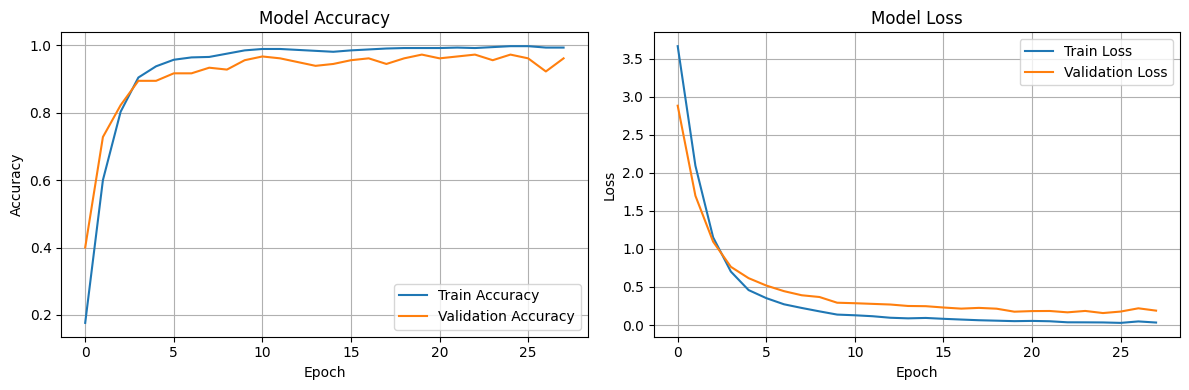

✅ Training history telah disimpan sebagai 'genetic_algorithm_training_history.png'


In [46]:
# =========== VISUALIZATION ===========

import matplotlib.pyplot as plt

print("\n📈 Menampilkan dan menyimpan grafik training history...")

# Buat figure untuk visualisasi
plt.figure(figsize=(12, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

# Tata letak dan simpan gambar
plt.tight_layout()
plt.savefig('genetic_algorithm_training_history.png')
plt.show()

print("✅ Training history telah disimpan sebagai 'genetic_algorithm_training_history.png'")



📊 Menampilkan Confusion Matrix dan Classification Report...


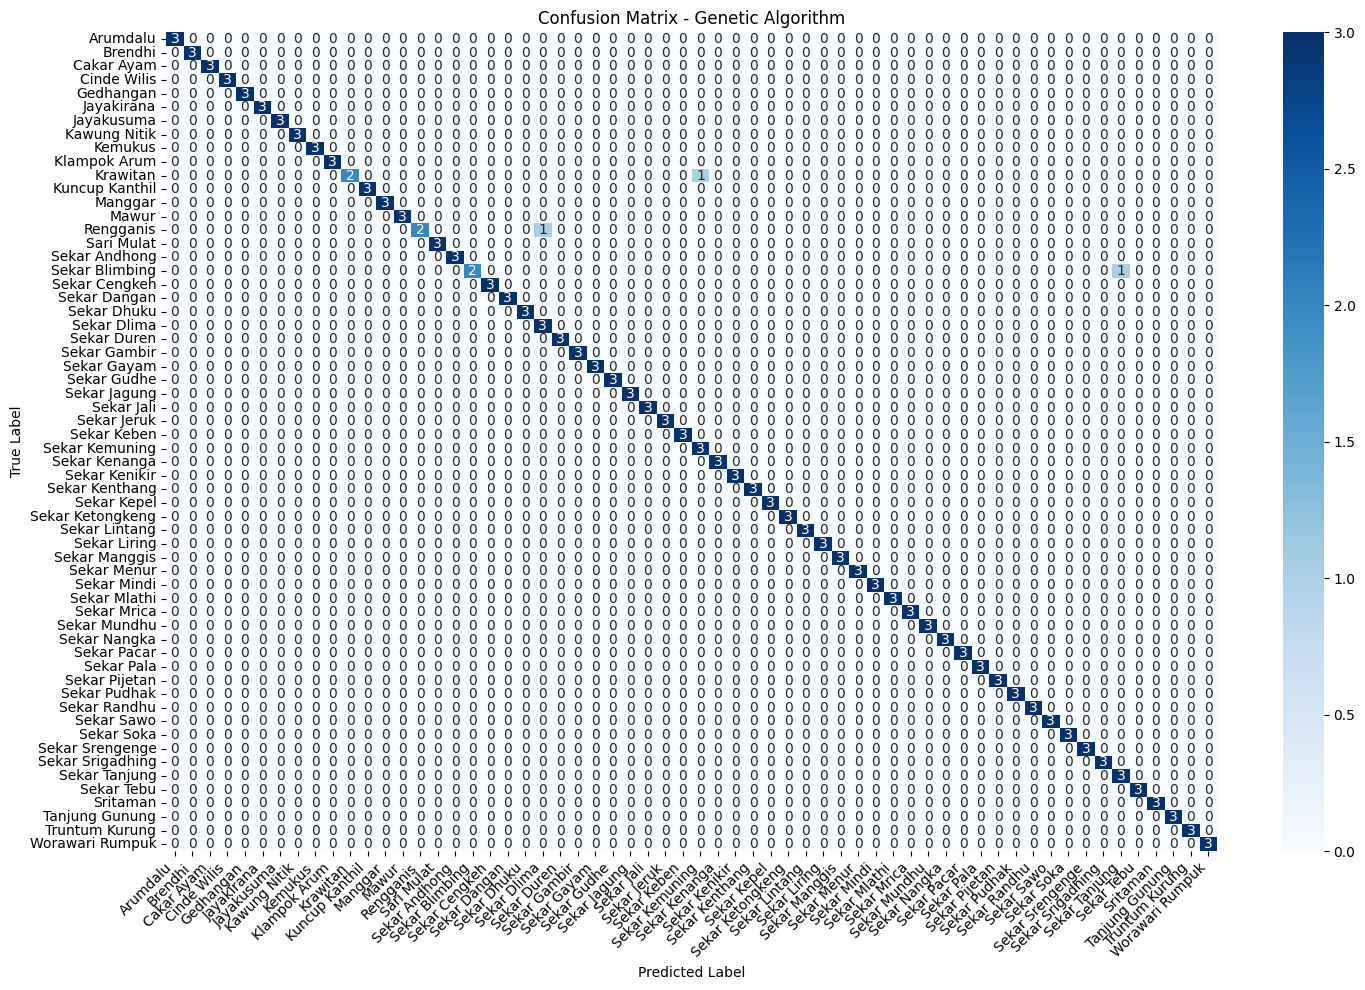

✅ Confusion Matrix telah disimpan sebagai 'genetic_algorithm_confusion_matrix.png'

📄 Classification Report:
                  precision    recall  f1-score   support

        Arumdalu       1.00      1.00      1.00         3
         Brendhi       1.00      1.00      1.00         3
      Cakar Ayam       1.00      1.00      1.00         3
     Cinde Wilis       1.00      1.00      1.00         3
       Gedhangan       1.00      1.00      1.00         3
      Jayakirana       1.00      1.00      1.00         3
      Jayakusuma       1.00      1.00      1.00         3
    Kawung Nitik       1.00      1.00      1.00         3
         Kemukus       1.00      1.00      1.00         3
    Klampok Arum       1.00      1.00      1.00         3
        Krawitan       1.00      0.67      0.80         3
  Kuncup Kanthil       1.00      1.00      1.00         3
         Manggar       1.00      1.00      1.00         3
           Mawur       1.00      1.00      1.00         3
       Rengganis    

In [47]:
# =========== CONFUSION MATRIX & CLASSIFICATION REPORT ===========

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("\n📊 Menampilkan Confusion Matrix dan Classification Report...")

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Genetic Algorithm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("genetic_algorithm_confusion_matrix.png")
plt.show()

print("✅ Confusion Matrix telah disimpan sebagai 'genetic_algorithm_confusion_matrix.png'")

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("\n📄 Classification Report:")
print(report)


In [51]:
# =========== ⏱️ GENETIC ALGORITHM TIMING SUMMARY ===========

import time
from datetime import datetime
import json

# Stop timer
genetic_algorithm_end_time = time.time()
genetic_algorithm_total_time = genetic_algorithm_end_time - genetic_algorithm_start_time

# Cetak waktu total komputasi dan waktu selesai
print(f"\n⏱️  Total waktu komputasi: {genetic_algorithm_total_time:.2f} detik")
print(f"📅 Waktu selesai: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Simpan ringkasan hasil dan waktu ke dalam dictionary
timing_results = {
    'method_name': 'Genetic Algorithm',
    'start_datetime': genetic_algorithm_start_datetime.strftime('%Y-%m-%d %H:%M:%S'),
    'end_datetime': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'total_time_seconds': genetic_algorithm_total_time,
    'total_time_minutes': genetic_algorithm_total_time / 60,
    'best_fitness': float(ga.best_fitness),
    'best_hyperparameters': best_hyperparameters,
    'test_accuracy': float(test_accuracy),
    'test_loss': float(test_loss),
    'population_size': ga.population_size,
    'generations': ga.generations,
}

# Simpan hasil ke file JSON
with open('genetic_algorithm_timing_results.json', 'w') as f:
    json.dump(timing_results, f, indent=2, ensure_ascii=False)

# Tampilkan ringkasan hasil di terminal
print("\n📊 RINGKASAN WAKTU KOMPUTASI GENETIC ALGORITHM:")
print(f"⏱️  Total waktu: {timing_results['total_time_minutes']:.2f} menit")
print(f"📅 Mulai: {timing_results['start_datetime']}")
print(f"📅 Selesai: {timing_results['end_datetime']}")
print(f"🏆 Best fitness: {timing_results['best_fitness']:.4f}")
print(f"📊 Test accuracy: {timing_results['test_accuracy']:.4f}")
print(f"📊 Test loss: {timing_results['test_loss']:.4f}")



⏱️  Total waktu komputasi: 1017.42 detik
📅 Waktu selesai: 2025-07-31 23:14:01

📊 RINGKASAN WAKTU KOMPUTASI GENETIC ALGORITHM:
⏱️  Total waktu: 16.96 menit
📅 Mulai: 2025-07-31 22:57:04
📅 Selesai: 2025-07-31 23:14:01
🏆 Best fitness: 0.9333
📊 Test accuracy: 0.9833
📊 Test loss: 0.1184
